# Building an Artificial Neural Network from scratch

## Objective:

The goal here is to deal with the XOr classification problem that can't be solved with classical logistic regression models. The XOr, or “exclusive or” problem is a classic problem that can be solved with Artificial Neural Network to predict the outputs of XOr logic gates given two binary inputs. The XOr function returns a true value if the two inputs are not equal and a false value if they are equal.<br/>

I will apply a such **ANN built from scratch** to a custom dataset generated for XOr binary classification.

![png](img/xor_example.png)

---

## Table of contents


1. [Generating Dataset](#data)
2. [Data Preprocessing](#dataprep)
3. [ANN - Model and background](#background)
4. [ANN from Scratch](#nn_scratch)
5. [Model evaluation](#evaluation)
6. [Comparison with sklearn MLPClassifier model](#comparison)
7. [Conclusion](#conclusion)

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

## 1.Generating Dataset<a id="data"></a>

**Let's generate our dataset using Numpy XOr logical function**

In [3]:
np.random.seed(50)
n_samples = 1000

# Generating n_samples from Normal distribution N(mu, sigma^2):
mu, sigma = 2, 3
X = sigma * np.random.randn(n_samples, 2) + mu
y = np.logical_xor(X[:, 0] > 1, X[:, 1] > 2).astype(int)

# Applying some distorsion to our distribution:
# Will be more challenging to our models
transformation = [[12, 7], [-5, 4]]
X = np.dot(X, transformation)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 2)
y shape: (1000,)


Here under a brief look on variables generated:

In [4]:
for i in range(4):
    print(f"Class:{y[i]} | Coordinates:{X[i]}")

Class:0 | Coordinates:[-41.70801186 -11.13912552]
Class:0 | Coordinates:[13.61528402 -8.61446272]
Class:1 | Coordinates:[71.98104254 45.93008284]
Class:1 | Coordinates:[-30.15090773  18.45335933]


### Data visualization

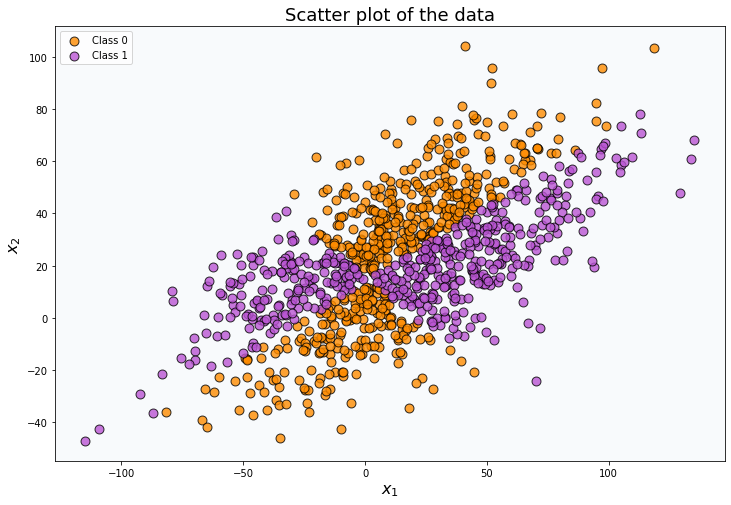

In [5]:
plt.rcParams.update({'axes.facecolor':'#f8fafc'})
%matplotlib inline

plt.figure(figsize=(12,8))

plt.scatter(X[y == 0, 0], X[y == 0, 1], label= 'Class 0',
            c= 'darkorange', marker= 'o', edgecolor='k', alpha=0.8, s=80)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label= 'Class 1',
            c= 'mediumorchid', marker= 'o', edgecolor='k', alpha=0.8, s=80)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Scatter plot of the data', fontsize=18)
plt.legend(loc="upper left", facecolor='white')

plt.show()

This is the kind of dataset where it is not possible to find a simple linear or non-linear frontier of separation between the two classes, and this is why an artificial neural network is helpfull in this case.

## 2.Data Preprocessing <a id="dataprep"></a>

### Splitting Dataset

Dataset is splitted into training set with 80% of the samples and test set with the remaining 20%, using "stratified sampling" to ensure that relative class frequencies is approximately preserved in each train and test fold.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= 0.2,
    stratify= y,
    random_state= 50)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (800, 2)
X_test shape: (200, 2)


### Data Scaling

Features are transformed to the given range [0,1] by scaling:

$X_{scaled} = X_{std} * (max - min) + min$<br/>
 Where:
 $X_{std} = (X - X_{min}) / (X_{max} - X_{min})$

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train) # fit and transform training set
X_test  = scaler.transform(X_test)      # transform testing set with "Scaler" fited

## 3.ANN - Model and background<a id="background"></a>

#### Artificial Neuron

As a reminder and support visualization for background equations, this is the structure of an artificial neuron.

![png](img/perceptron.png)

#### Artificial Neural Network Model definition

This is the model's structure that I'm going to build from scratch:

![png](img/neural_network_model.png)

#### Step 1: Forward Propagation

$1^{st} \hspace{2mm}layer\hspace{2mm}summation: Z^{[1]} = W^{[1]}X + b^{[1]}$

$1^{st} \hspace{2mm}layer\hspace{2mm}activation: A^{[1]} = g^{[1]}{(Z^{[1]})}$

$2^{nd} \hspace{2mm}layer\hspace{2mm}summation: Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$

$2^{nd} \hspace{2mm}layer\hspace{2mm}activation: A^{[2]} = g^{[2]}{( Z^{[2]} )}$

Where $X = [x_1, x_2, ..., x_N]$ is the data matrix with N samples, and the $g^{[i]}$ are the activation functions  Sigmoid: $\sigma(x) = \frac{1}{1 + exp(-x)}$

#### Step 2: Cross entropy loss

$J = \frac{1}{N} \sum\limits_{i = 0}^{N} \large{(} \small - y^{(i)}\log\left(a^{[2] (i)}\right) - (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$

#### Step 3: Back Propagation

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{N} dZ^{[2]} {A^{[1]}}^T$

$db^{[2]} = \frac{1}{N} \sum dZ^{[2]} $

$dZ^{[1]} = ({W^{[2]}}^T  dZ^{[2]}) * {g^{[1]'}} (Z^{[1]})$

$dW^{[1]} = \frac{1}{N} dZ^{[1]} {X}^T$

$db^{[1]} = \frac{1}{N} \sum dZ^{[1]} $

<br/>

Where $ \frac{dJ}{dZ^{[2]}} = \frac{dJ}{dA^{[2]}} \frac{dA^{[2]}}{dZ^{[2]}} \implies {dZ^{[2]}} = dA^{[2]} {g^{[2]'}} (Z^{[2]}) = A^{[2]} - Y $


$ \frac{dJ}{dW^{[2]}}  = \frac{dJ}{dZ^{[2]}} \frac{dZ^{[2]}}{dW^{[2]}} \implies {dW^{[2]}} = \frac{1}{N} dZ^{[2]} {A^{[1]}}^T$

With ${g'(z)} = \frac{d}{dz} g(z) $

Knwowing that for sigmoid fuction we get: ${\sigma}'(z) = \sigma(z) (1 - \sigma(z))$

## 4. ANN from Scratch <a id="nn_scratch"></a>

### Let's build step by step a Neural Network python class

In [8]:
class Artificial_Neural_Network:
    
    # Step 1: Implementing initialization function with default parameters
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.1, num_iter= 1000):
        self.W1 = np.random.randn(n_h, n_x)
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
    
    # Step 2: Implementing sigmoid function and its differential
    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))
    
    def sigmoid_derivative(self, t):
        return self.sigmoid(t)*(1 - self.sigmoid(t))
    
    # Step 3: Implementing forward propagation
    def feedforward(self, X):
        self.Z1 = self.W1.dot(X.T) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2
    
    # Step 4: Implementing backward backpropagation
    def backpropagation(self, X, y):
        N = X.shape[0] # Number of samples
        dZ2 = self.A2 - y.T
        self.dW2 = 1/N * dZ2.dot(self.A1.T)
        self.db2 = 1/N * dZ2.sum(axis=1, keepdims= True)
        dZ1 = self.W2.T.dot(dZ2) * self.sigmoid_derivative(self.Z1)
        self.dW1 = 1/N * dZ1.dot(X)
        self.db1 = 1/N * dZ1.sum(axis=1, keepdims= True)
        
    #Step 5: Implementing weights and bias update
    def update_parameters(self):
        self.W1 -= self.lr * self.dW1
        self.b1 -= self.lr * self.db1
        self.W2 -= self.lr * self.dW2
        self.b2 -= self.lr * self.db2
    
    # Step 6: Implementing cross entropy loss
    def loss(self,y, y_hat):
        return (-y * np.log(y_hat) - (1-y) * np.log(1 - y_hat)).mean()
    
    # Step 7: Implementing the fit function (to train the model on data)
    def fit(self, X, y):
        loss_history = []
        accuracy_history = []
        
        for iter in tqdm(range(self.num_iter)):
            y_hat = self.feedforward(X)
            loss_history.append(self.loss(y, y_hat))
            self.backpropagation(X, y)
            self.update_parameters()
            
            y_hat = y_hat.round().reshape(-1)
            accuracy_history.append((y_hat == y).mean())
            
        return loss_history, accuracy_history
    
    # Step 8: Implementing probability estimation calculation
    def predict_proba(self, X):
        return self.feedforward(X) # return a probability
    
    # Step 9: Implementing Class label prediction
    def predict(self, X):
        return self.predict_proba(X).round().reshape(-1)
        # if predict_proba > 0.5  -> will return 1
        # if predict_proba <= 0.5 -> will return 0

### Now we can define some parameters and hyper parameters ...

In [9]:
N_INPUT_LAYER = X.shape[1]  # nb of neurons of input layer (number of features)
N_HIDDEN_LAYER1 = 3         # nb of neurons of intermediate layer
N_OUTPUT_LAYER = 1          # nb of neurons of output layer (gives predicted class 0 or 1)

LEARNING_RATE = 0.2
ITERATIONS = 80000

### ... create an instance of our Neural Network class

In [10]:
ANN_model = Artificial_Neural_Network(
    n_x = N_INPUT_LAYER,
    n_h = N_HIDDEN_LAYER1,
    n_y = N_OUTPUT_LAYER,
    lr = LEARNING_RATE,
    num_iter = ITERATIONS)

### Fit the model over training set ... and finally evaluate our model !

In [11]:
loss, accuracy = ANN_model.fit(X_train, y_train)

100%|██████████| 80000/80000 [00:32<00:00, 2473.67it/s]


## 5.Model evaluation<a id="evaluation"></a>

### Let's have a look on our accuracy and loss evolution

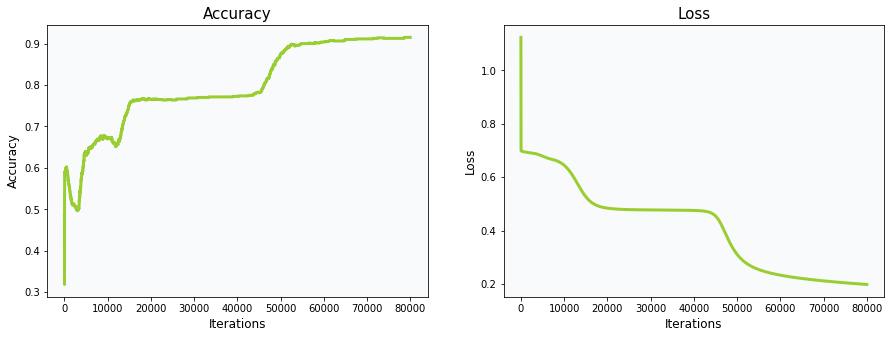

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(accuracy, c= 'yellowgreen', linewidth=3)
plt.xlabel('Iterations', fontsize = 12), plt.ylabel('Accuracy', fontsize = 12)
plt.title('Accuracy', fontsize = 15)

plt.subplot(122)
plt.plot(loss, c= 'yellowgreen', linewidth=3)
plt.xlabel('Iterations', fontsize = 12), plt.ylabel('Loss', fontsize = 12)
plt.title('Loss', fontsize = 15)

plt.show()

Note how many many iterations the model needs in order to converge.

### Now we can check the model's accuracy on training set ...

In [13]:
y_train_pred = ANN_model.predict(X_train)

In [14]:
train_accuracy = (y_train_pred == y_train).mean()
print(f'Accuracy over training set = {100 * train_accuracy:.2f}%')

Accuracy over training set = 91.50%


### ... And check the accuracy of our model on the testing set

In [15]:
y_test_pred = ANN_model.predict(X_test)

In [16]:
test_accuracy = (y_test_pred == y_test).mean()
print(f'Accuracy over testing set = {100 * test_accuracy:.2f}%')

Accuracy over testing set = 91.00%


We obtain a great accuracy on test data !!

### Checking classification capabilities with the Classification report ...

In [17]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       103
           1       0.92      0.89      0.91        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



We get pretty good classification scores here !

### ... And the Confusion Matrix

In [18]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

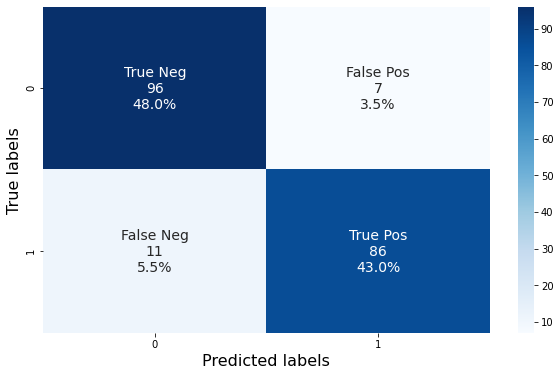

In [19]:
plt.figure(figsize=(10,6))

names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}' for value in cf_matrix.flatten()]
percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{l1}\n{l2}\n{l3}' for l1, l2, l3 in
                           zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')
plt.ylabel('True labels', size=16)
plt.xlabel('Predicted labels', size=16)

plt.show()

Over the 200 samples of the test set, we get only 7 samples with a Type I error (false positive) and only 11 samples with a Type II error (false negative).<br/>

**We can say that our model has good classification capabilities regarding the given data.**

## 6.Comparison with sklearn MLPClassifier model<a id="comparison"></a>

Fisrt I define hyperparameters, choosing same parameters that I used for the custom model, except the number of iterations set to 500 ... that will be enough with this model.

In [89]:
N_HIDDEN_LAYER1 = 3 # nb of neurons of intermediate layer

LEARNING_RATE = 0.2
ITERATIONS = 500

Then I define a Multi Layer Perceptron Classifier model using Sklearn library...

In [90]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(
    hidden_layer_sizes=(N_HIDDEN_LAYER1),
    activation='logistic',
    solver='adam',
    learning_rate_init=LEARNING_RATE,
    max_iter=ITERATIONS)

... and fit the model to the data.

In [91]:
MLP_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=3,
              learning_rate_init=0.2, max_iter=500)

Let's have a look on the learning curve:

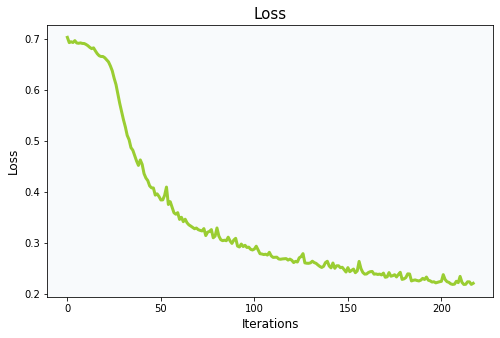

In [92]:
plt.rcParams.update({'axes.facecolor':'#f8fafc'})
plt.figure(figsize=(8,5))

plt.plot(MLP_model.loss_curve_, c= 'yellowgreen', linewidth=3)
plt.xlabel('Iterations', fontsize = 12), plt.ylabel('Loss', fontsize = 12)
plt.title('Loss', fontsize = 15)

plt.show()

Clearly, this model converges much faster than our ANN model built from scratch ! It needs around 200 iterations to do so. This is due to the efficiency of the ADAM optimization algorithm which is much faster than our loss optimizer.

In [93]:
from sklearn.metrics import accuracy_score

y_train_pred = MLP_model.predict(X_train)
y_test_pred = MLP_model.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.92
Testing Accuracy: 0.92


Good accuracy on test set !

In [94]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       103
           1       0.92      0.91      0.91        97

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



Classification report show good scores, comparable to those obtained with the custom model.

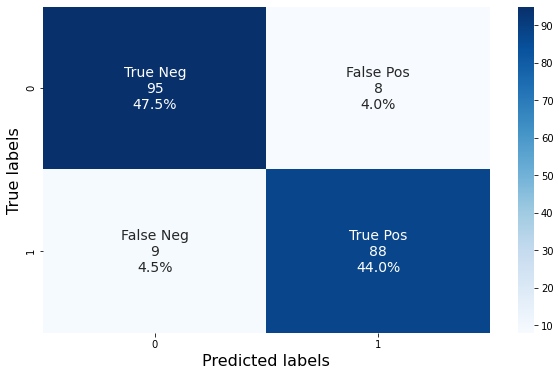

In [95]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,6))

names = ['True Neg','False Pos','False Neg','True Pos']
counts = [f'{value:0.0f}' for value in cf_matrix.flatten()]
percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{l1}\n{l2}\n{l3}' for l1, l2, l3 in
                           zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')
plt.ylabel('True labels', size=16)
plt.xlabel('Predicted labels', size=16)

plt.show()

Same comment for this confusion matrix ... very close to the previous one obtained with the custom model.

## 7.Conclusion<a id="conclusion"></a>

**Comparing both models, one can see that the custom model is very close to the Sklearn model, ery similar results are observed:**

In [100]:
import tabulate
import pandas as pd
results = {
    'Model': ["Custom ANN", 'Sklearn ANN'],
    'f1': [91, 91.5],
    'precision': [91.5, 91.5],
    'recall': [91, 91.5],
    'error Type I': ['3.5%', '4.0%'],
    'error Type II': ['5.5%', '4.5%']}

df_results = pd.DataFrame(data=results).set_index('Model')
print(df_results.to_markdown())

| Model       |   f1 |   precision |   recall | err Type I   | err Type II   |
|:------------|-----:|------------:|---------:|:-------------|:--------------|
| Custom AnN  | 91   |        91.5 |     91   | 3.5%         | 5.5%          |
| Sklearn ANN | 91.5 |        91.5 |     91.5 | 4.0%         | 4.5%          |


**On the other hand**, the Sklearn model is a lot more faster in term of convergence, as it uses a faster and ADAM  optimizer (see table below)

In [3]:
learning = {
    'Model': ["Custom ANN", 'Sklearn ANN'],
    'lear iter': [80000, MLP_model.loss_curve_.index(MLP_model.loss_curve_[-1])],
    'final loss': [round(loss[-1],3), round(MLP_model.loss_curve_[-1], 3)]}

df_learning = pd.DataFrame(data=learning).set_index('Model')
print(df_learning.to_markdown())

| Model       |   learn iter |   final loss |
|:------------|-------------:|-------------:|
| Custom AnN  |        80000 |        0.198 |
| Sklearn ANN |          217 |        0.221 |


**Now we have a custom Artificial Neural Network, built from scratch, with quiet good classification capabilities for all simple Xor-like datasets.<br/>**

**Compared to the prebuilt model that already exists in Sklearn library, this custom model is not so fast and optimized... but that is a funny and good start exercise for a better background comprehension of artificial neural networks.**

**It is also a starting point from which we can improve and adapt this model to new issues! Ex: by adding more layers, implementing more robust optimizers, etc ...**